In [1]:
import matplotlib.pyplot as plt
import pandas as pd
# 最初の例題として用いるのはiris（アヤメ）のデータである．まずはpandasを用いてデータを読んでおく．

df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#ヒストグラム

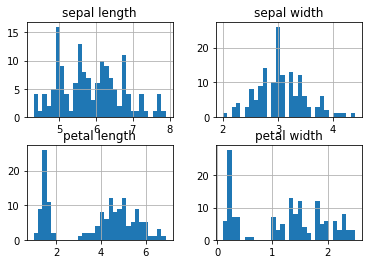

In [2]:
# まずはヒストグラム（histgram, 度数分布表）を描画してみる．
# ヒストグラムは数値データの分布の概要を知る際に便利である．
# pandasのデータフレームのhistメソッドを用いる．
# 引数binsでビンの数（x軸の区分数）を指定できる．（色々変えて試してみよう．規定値は 10 である．）

df.hist(bins=30);

In [3]:
# 問題1（SAT，GPA）
# http://logopt.com/data/SATGPA.csv データを読み込み，2種類のSATの成績とGPAのヒストグラムを描画せよ． また，引数のbinsを色々変えてみよ．

In [4]:
# 問題2（ポケモン）
# 以下のように読み込んだポケモンのデータフレームを用いて，攻撃力(Attack)，守備力（Defense)のヒストグラムを描画せよ．

pokemon = pd.read_csv("http://logopt.com/data/poke.csv", encoding="utf-8",index_col=0)
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Japanese
#,,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,フシギダネ
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,フシギソウ
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,フシギバナ
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,フシギバナ・メガ進化
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,ヒトカゲ


#散布図

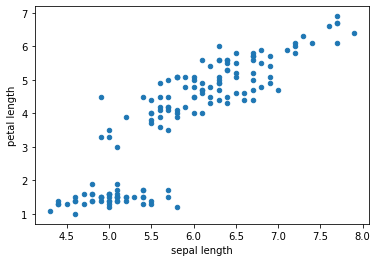

In [5]:
# 散布図（scatter plot)は，2つの数値データの関係を知る際に便利である．
# pandasのデータフレームのplot.scatterメソッドを用いる．

# 引数のxとyで x,yx,y 軸に使用するデータ（データフレームの列名）を指定する．
# ここでは'がく片長 'sepal length'と花びら長 'petal length'の関係を図示してみる．

df.plot.scatter(x='sepal length', y= 'petal length');

In [6]:
# 問題3 （ダイヤモンド）
# http://logopt.com/data/Diamond.csv からダイアモンドの価格データを読み込み，カラット"carat"と価格 "price" の散布図を描け．

In [7]:
# 問題4 （ポケモン）
# ポケモンのデータフレームに対して，攻撃力(Attack)，守備力（Defense)の関係を散布図に描画せよ．

#他の図

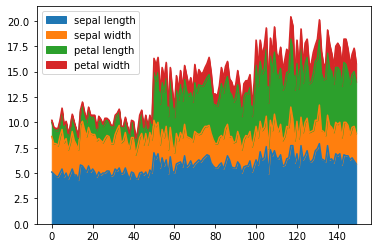

In [8]:
# pandasのデータフレームのplotの中には他にも様々な描画メソッドが含まれている．
# 色々試してみよう．

df.plot.area(); #面積図

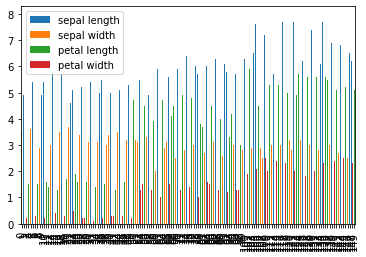

In [9]:
df.plot.bar(); #棒グラフ

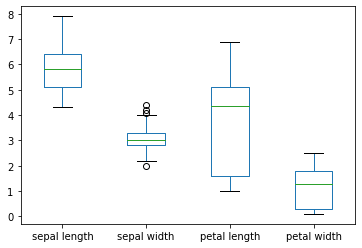

In [10]:
df.plot.box();#箱ひげ図

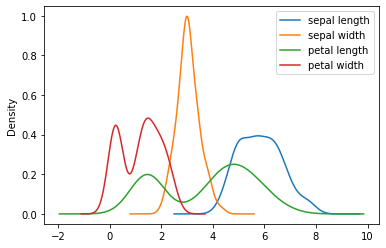

In [11]:
df.plot.density();#カーネル密度推定（kdeと同じ）

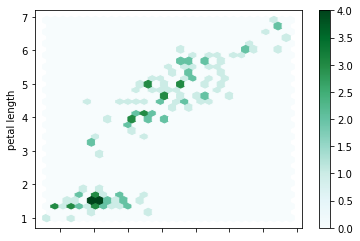

In [12]:
df.plot.hexbin(x='sepal length', y= 'petal length', gridsize=30); #6角形格子図（散布図と同様に，x,y軸を入れる．）

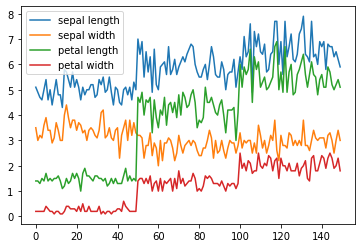

In [13]:
df.plot.line();#線グラフ df.plot()でも同じ

In [14]:
# 問題5（ポケモンの応用）
# ポケモンのデータを自分なりに可視化せよ．その際，どの列に対して，どの図を選択すれば良いか考え，考察とともにレポートせよ．

#多次元データ 1 並行座標図

In [15]:
# 散布図では3次元までの図を可視化できる（3次元の場合の方法については教科書参照）が，4次元以上だと人間の目では無理だ．
# 多次元データを可視化するための方法として並行座標図がある．

# これは散布図の y 軸を x 軸と並行にしたものである．複数の y 軸があっても大丈夫だが，あまり多いとよく分からなくなる．

# pandasではplottingにあるparallel_coordinates 関数を用いて並行座標図を描画できる．
# 第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

# 並行座標図は，比例関係は平行な直線で，反比例関係は1つの点で交わる直線群で描画する．
# 例として，x= 0,1,2, \ldots,9x=0,1,2,…,9，y=2xy=2x, z=10-xz=10−x を描画してみよう．

from pandas.plotting import parallel_coordinates
data = []   # x,y,zを入れたリストを作成
for i in range(10):                    
    row = [ i, 2*i, 10-i, 'dummy' ] #クラス名を指定するためにダミーの列を最後に追加
    data.append( row )
testdf = pd.DataFrame(data)
testdf

,0,1,2,3
0,0,0,10,dummy
1,1,2,9,dummy
2,2,4,8,dummy
3,3,6,7,dummy
4,4,8,6,dummy
5,5,10,5,dummy
6,6,12,4,dummy
7,7,14,3,dummy
8,8,16,2,dummy
9,9,18,1,dummy


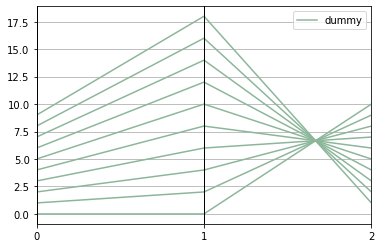

In [16]:
parallel_coordinates(testdf, 3); #ダミーの列の名前は 3 

In [17]:
# 問題6（アヤメとポケモン）
# 1,iris（アヤメ）のデータフレームをアヤメの種類 'class' ごとに並行座標図に描画せよ．
iris = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])


In [18]:
# 問題7
# ポケモンデータを並行座標図で描画せよ． ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．

#多次元データ 2： Andrew曲線

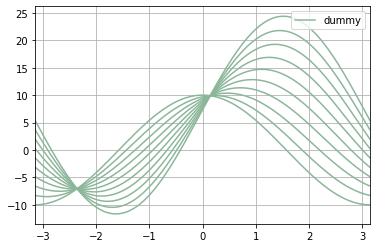

In [19]:
# 多次元データを可視化するためのもう1つの方法としてAndrew曲線がある．
# これは．多次元データ x1,x2をフーリエ曲線で変換し，-\pi < t < \pi−π<t<π の間に描画したものである．

# pandasではplottingにあるandrews_curves 関数を用いて並行座標図を描画できる．
# 第1引数はデータフレームであり，第2引数は分けて描画したいクラスを表す列名を与える．

# 例として，x= 0,1,2, \ldots,9x=0,1,2,…,9，y=2xy=2x, z=10-xz=10−x を描画してみよう．

from pandas.plotting import andrews_curves
andrews_curves(testdf, 3);

In [20]:
# 問題8（アヤメとポケモン）
# 1,アヤメ(iris)データをアヤメの種類 'class' ごとにAndrew曲線で描画せよ．


In [21]:
# 問題9
# 2,ポケモンデータをAndrew曲線で描画せよ． ただし，伝説ポケモンか否か（Legendary)でクラス分けを行い，軸としては体力(HP)，攻撃力(Attack)，守備力(Defense)を用いよ．

#データ解析用描画モジュール seaborn

In [22]:
# seabornを用いることによって，さらに簡単にデータ解析ができ，描画も綺麗になる．
# まずはseabornモジュールをsnsという別名で読み込んでおく．

import seaborn as sns
%matplotlib inline

In [23]:
# ヒストグラム
# seabornでヒストグラム（histgram, 度数分布表）に対応するものはdisplot（distribution plot）だ．
# 例としてiris（アヤメ）のデータの「がく片長」('sepal length')を描画してみる．
# 引数としては，以下のものがあるので，色々試してみよう．

# bins: ビンの数
# kde: カーネル密度推定の有無
# rug: データの位置(敷物:rug)の有無

df = pd.read_csv('http://logopt.com/data/iris.data', names=['sepal length','sepal width','petal length','petal width', 'class'])
df.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


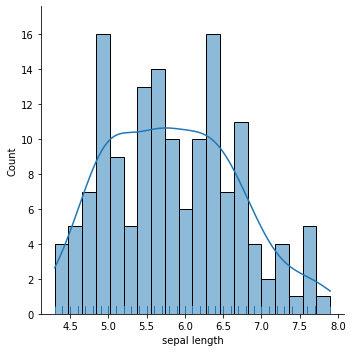

In [24]:
sns.displot(df['sepal length'], bins=20, rug=True, kde =True);

In [25]:
# 問題10(SAT, GPA)
# http://logopt.com/data/SATGPA.csv データを読み込み，GPAの分布をdistplotを用いて描画せよ．

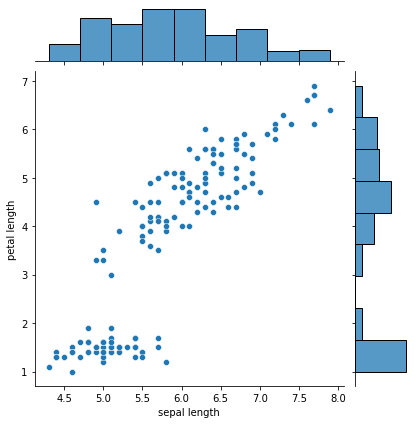

In [26]:
# 散布図
# seabornで散布図に対応するものはjointplotだ．おまけとして分布も表示される．
# 引数としては，x,yx,y と datadata の他に種類を表すkindがある．
# kindは以下のものがとれるので，色々試してみよう．

# "scatter"：普通の散布図
# "reg" : 回帰分析
# "resid" : 回帰の残差
# "kde" : カーネル密度推定
# "hex" : 6角形格子

sns.jointplot( x='sepal length', y='petal length', data=df,  kind='scatter');

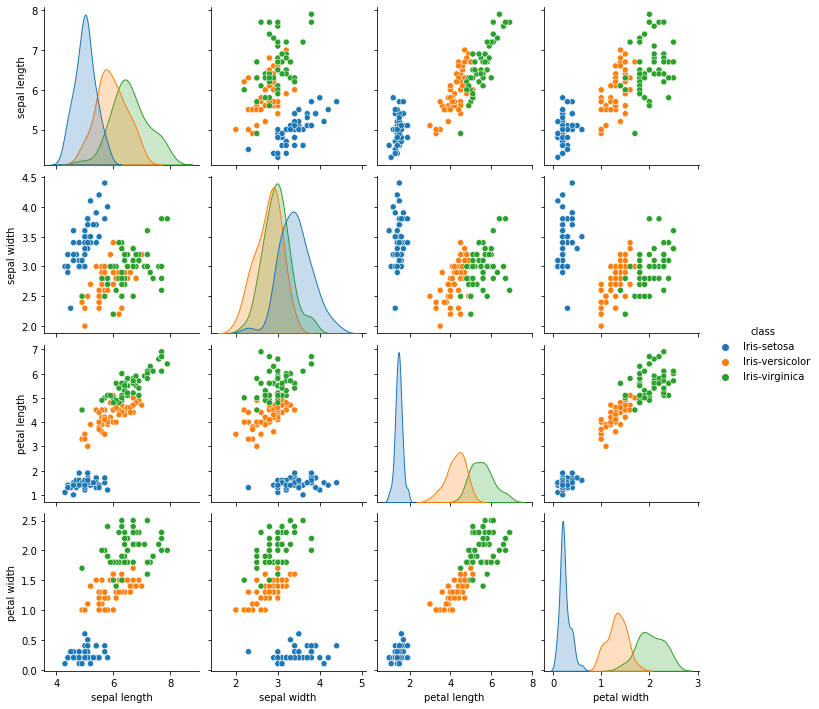

In [27]:
# データフレームに含まれる複数の列間の散布図を一度に描画するにはpairplotを用いる．
# 引数としてhue（色調）をとることができ，色を変えたい列名（以下の例ではアヤメの種類('class'）を指定して描画している．

sns.pairplot(df, hue='class');

In [28]:
# 問題11(SAT,GPA)
# 1,http://logopt.com/data/SATGPA.csv データを読み込み，MathSATとGPAの関係をjointplotを用いて描画せよ．

In [29]:
# 問題12
# 2,http://logopt.com/data/SATGPA.csv データを読み込み，MathSAT, VerbalSAT, GPAの相互関係をpairplotを用いて描画せよ．

In [30]:
# 回帰プロット
# seabornでは統計モジュールstatsmodelsを用いた回帰分析の結果を描画することができる．
# カテゴリーデータ別の回帰を行いたい場合には lmplot を用いる．

# 例としてtipsデータを用いる．
# FacetGridでは行(row)と列(col)を表すカテゴリーデータを引数で指定できる他に，色調(hue)も用いることができる．
# 以下の例では，tipsデータに対して支払総額（'total_bill'）とチップ（'tip'）の関係を， 行に喫煙者か否か（row='smoker'），列に性別（col='sex'），色調に昼食か夕食か（hue='time')を設定して分析する．

tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


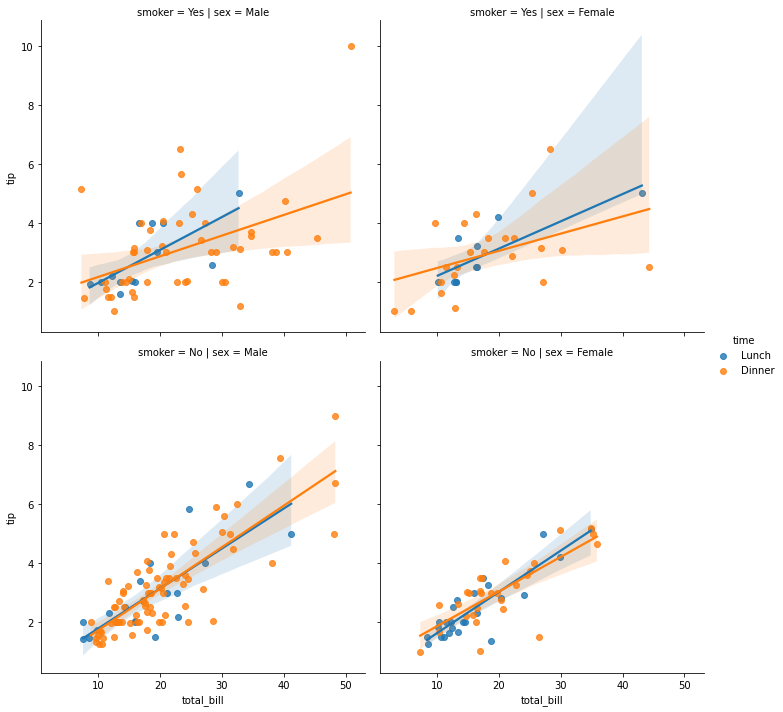

In [31]:
sns.lmplot(x='total_bill', y='tip', data=tips, row='smoker', col='sex', hue='time');

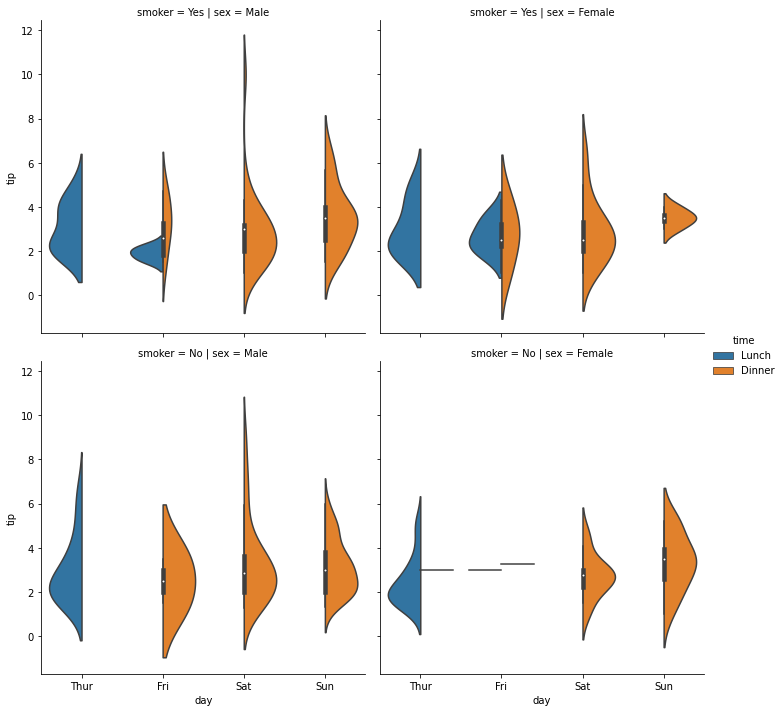

In [32]:
# カテゴリーデータの分析
# カテゴリーデータ別に集計したい場合には，catplotを用いると便利だ．

# 引数は以下の通り．

# x: x軸
# y: y軸
# data: データフレーム
# row: 行名
# col: 列名
# hue: 色調
# kind: グラフの種類 (point, bar, count, box, violin, strip)
# split: バイオリン図(violin：箱ひげ図の拡張)の場合だけ有効で，Trueのとき左右に色調を分けて描画する．
# 以下の例では，tipsデータに対し，日ごと(x)のチップ（y)を喫煙者か否か（row='smoker'），性別（col='sex'）， 昼食か夕食か（hue='time'）ごとにバイオリン図で描画している．

sns.catplot(x='day', y='tip',  data=tips, row='smoker', col='sex', hue='time', split=True, kind='violin');

In [33]:
# 問題13（タイタニック）
# titanicデータを読み込み，運賃(fare）と生存確率(survived)のロジスティック回帰を，性別(sex)ごとに行え． （ヒント：ロジスティック回帰を行うには，lmplotの引数のlogisticをTrueにする．）
titanic = sns.load_dataset('titanic')
titanic.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [34]:
# 問題14
# titanicデータを読み込み，客室クラス(class）と性別(sex)ごとの生存確率(survived)を集計した結果を描画せよ．
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
